**Remember to make github private after every coding session**

# Dataset Cleaning

In [1]:
! rm -rf  Finance_Graph_Theory
! git clone https://github.com/AvijitGhosh82/Finance_Graph_Theory

Cloning into 'Finance_Graph_Theory'...
remote: Counting objects: 129, done.
remote: Compressing objects: 100% (108/108), done.
remote: Total 129 (delta 49), reused 44 (delta 11), pack-reused 0
Receiving objects: 100% (129/129), 4.34 MiB | 17.79 MiB/s, done.
Resolving deltas: 100% (49/49), done.


In [0]:
import pandas as pd
df = pd.read_csv('Finance_Graph_Theory/Country.csv')
df.dtypes

In [38]:
df = df.groupby(['Country']).sum()
df.head(5)


,AUS,AUS.1,AUS.2,AUS.3,AUS.4,AUS.5,AUS.6,AUS.7,AUS.8,AUS.9,...,ROW.46,ROW.47,ROW.48,ROW.49,ROW.50,ROW.51,ROW.52,ROW.53,ROW.54,ROW.55
Country,,,,,,,,,,,,,,,,,,,,,
AUS,22743,983,736,45918,44552,2679,5094,3962,3062,13648,...,194,0,173,190,1428,1172,580,533,0,0
AUT,9,0,0,23,11,3,1,4,3,1,...,90,0,87,103,561,336,327,247,0,0
BEL,20,0,0,33,18,3,2,8,5,2,...,135,0,168,205,947,549,637,489,0,0
BGR,0,0,0,0,0,0,0,0,0,0,...,10,0,16,22,117,62,87,54,0,0
BRA,17,0,0,11,52,6,1,4,4,3,...,80,0,149,166,774,488,521,548,0,0


In [55]:
df_trans = df.T
# df_trans.index.names = ['index']
df_trans.to_csv('temp.csv')
df_trans = pd.read_csv('temp.csv')
df_trans.rename(columns={'Unnamed: 0': 'Country'}, inplace=True)
df_trans['Country'] = df_trans['Country'].astype(str).str[:3]
df_trans = df_trans.groupby(['Country']).sum()
df_trans.to_csv('Countrytrans.csv')
df_trans.head()

,AUS,AUT,BEL,BGR,BRA,CAN,CHE,CHN,CYP,CZE,...,PRT,ROU,ROW,RUS,SVK,SVN,SWE,TUR,TWN,USA
Country,,,,,,,,,,,,,,,,,,,,,
AUS,904769,353,479,1,405,931,979,11328,0,72,...,28,5,48076,320,6,7,776,191,1766,10805
AUT,28,265580,1524,227,120,168,3440,1169,28,3874,...,134,838,7235,2029,2080,1009,942,580,242,2009
BEL,317,1351,337154,704,1565,991,3641,5304,65,1686,...,573,459,19054,1891,296,209,2839,1246,310,11299
BGR,0,379,99,45958,79,47,46,177,37,166,...,9,576,2759,3100,46,29,33,1048,33,158
BRA,1031,741,937,23,1182689,1043,1091,7430,0,192,...,390,25,49164,774,17,10,691,654,3057,15201


# Growth Models

In [0]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import collections
import scipy.cluster.vq as vq
import numpy.linalg as la # For finding eigenvalues and eigenvectors
import itertools
from networkx.algorithms.community.centrality import girvan_newman
import pandas as pd
import io
import math

In [93]:
data = pd.read_csv('Countrytrans.csv',delimiter=',') 
countries = data.columns.tolist()[1:]
data = np.matrix(data)
data = np.delete(data, 0, 1)
data = np.array(data)

# print (countries)

rows, columns = np.shape(data)
n = rows
print (n)

44


In [0]:
def create_graph(g):
    node_size = []
    for i in range(len(countries)):
        node_size.append(data[i][i])
        g.add_node(countries[i], node_size = data[i][i])

    for i in range(len(countries)):
        for j in range(len(countries)):
            if i == j or data[i][j]==0:
                pass
            else:
                g.add_weighted_edges_from([(countries[i],countries[j],data[i][j] * 1)])
    return node_size
  

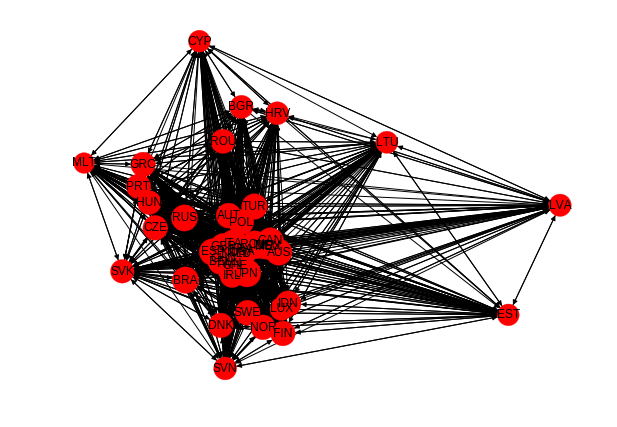

In [164]:
g = nx.MultiDiGraph()
node_size = create_graph(g)
pos = nx.spring_layout(g)
nx.draw(g,pos, with_labels=True,node_color = "red", node_list="header", node_size=[math.log(v)*50 for v in node_size])
plt.show()

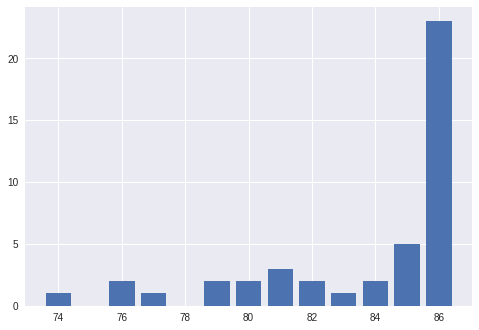

(86, 85, 84, 83, 82, 81, 80, 79, 77, 76, 74) (23, 5, 2, 1, 2, 3, 2, 2, 1, 2, 1)


In [165]:
# Calculate degree distribution histogram
#degree_sequence = sorted(nx.degree(g).values(),reverse=True) # degree sequence
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)  # degree sequence

degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
plt.bar(deg, cnt)#, width=0.80, color='b')
#plt.scatter(deg,cnt)

# PLot both graphs together
#plt.axes([0.4, 0.4, 0.5, 0.5])  
#nx.draw(g,pos,node_size = 100)
plt.show()
print (deg,cnt)

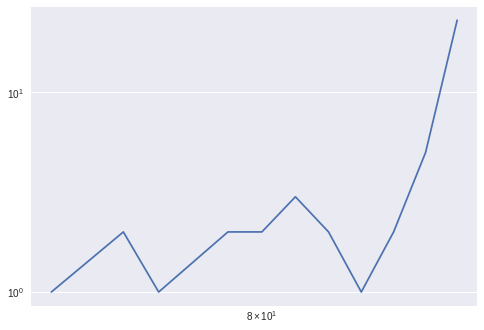

In [166]:
plt.loglog(deg,cnt)

In [167]:
r=nx.degree_assortativity_coefficient(g)
print ("Assortavity  :" + str(r))

# #Calculate clustering
# clustering = nx.average_clustering(g)
# print("Clustering :" + str(clustering))

# Calculate density
density = nx.density(g)
print ("Density :" + str(density))

Assortavity  :-0.08865177759337561
Density :0.9730443974630021
